In [ ]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

--2021-01-07 08:09:22--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz.8’

cifar-10-python.tar 100%[===================>] 162.60M  75.8MB/s    in 2.1s    

2021-01-07 08:09:24 (75.8 MB/s) - ‘cifar-10-python.tar.gz.8’ saved [170498071/170498071]



In [ ]:
!tar -xzvf cifar-10-python.tar.gz

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [ ]:
#reading batches and converting them to test and train sets at once.
import pickle
import numpy as np
from PIL import Image

def Decompress(file):
  with open(file, 'rb') as file:
    dict = pickle.load(file, encoding = 'bytes')
  return dict

def read_CIFAR(image_width, image_height):
    # Reading all train batches
    batch1 = Decompress('/content/cifar-10-batches-py/data_batch_1')
    batch2 = Decompress('/content/cifar-10-batches-py/data_batch_1')
    batch3 = Decompress('/content/cifar-10-batches-py/data_batch_1')
    batch4 = Decompress('/content/cifar-10-batches-py/data_batch_1')
    batch5 = Decompress('/content/cifar-10-batches-py/data_batch_1')
    # Reading test batch
    TestBatch = Decompress('/content/cifar-10-batches-py/test_batch')
    #To be noted that pickle.load decompresses the object in a dictionary.
    #labels will be 10 classes of CIFAR Dataset.
    #In total, It contains 50k Train images(5k per class)
    labels = ["airplane", "automobile","bird","cat","deer", "dog", "frog", "horse", "ship", "truck"]
    #displaying keys of batch label 
    print(batch1.keys())
    #concatenating each batch data and labels ..
    #total number of samples
    total_train_samples = len(batch2[b'labels']) + len(batch2[b'labels']) + len(batch3[b'labels']) + len(batch4[b'labels']) + len(batch5[b'labels'])

    # For training samples
    X_train = np.zeros(shape= [total_train_samples, image_width, image_height,3], dtype = np.uint8)
    Y_train = np.zeros(shape = [total_train_samples, len(labels)], dtype = np.uint8)

    batches = [batch1, batch2, batch3, batch4, batch5]
    index = 0

    for batch in batches:
      for i in range(len(batch[b'labels'])):
        feature = batch[b'data'][i].reshape(3,32,32).transpose([1,2,0])
        feature = np.array(Image.fromarray(feature).resize((image_width,image_height),2))
        label_class_idx = batch[b'labels'][i]
        #For debugging purposes ::
        label = np.zeros(shape = [len(labels)], dtype = np.int)
        #assigning the corresponding index as 1
        label[label_class_idx] = 1
        X_train[i] = feature
        Y_train[i] = label

      i += len(batch[b'labels'])

    #For Test samples
    X_test = np.zeros(shape = [len(TestBatch[b'labels']), image_width, image_height, 3], dtype = np.uint8)
    Y_test = np.zeros(shape =  [len(TestBatch[b'labels']), len(labels)], dtype = np.uint8)

    for test_batch in TestBatch :
      for i in range(len(TestBatch[b'labels'])):
        test_feature = TestBatch[b'data'][i].reshape(3,32,32).transpose([1,2,0])
        test_feature = np.array(Image.fromarray(test_feature).resize((image_width,image_height),2))
        test_label_idx = TestBatch[b'labels'][i]
        #Creating an one hot encoded array
        test_label = np.zeros(shape=[len(labels)])
        #assigning the corresponding index as 1
        test_label[test_label_idx] = 1
        X_test[i] = test_feature
        Y_test[i] = test_label


    return [X_train,Y_train, X_test, Y_test]

        #print(np.shape(feature))



In [ ]:
Dataset = read_CIFAR(224,224)

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])


In [ ]:
#they must be 60k samples
len(Dataset[0])+  len(Dataset[2])

60000

In [ ]:
#designing Alex Net Architecture in Tensorflow
#importing libraries
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2.4.0


(224, 224, 3)


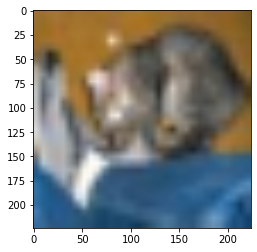

(224, 224, 3)


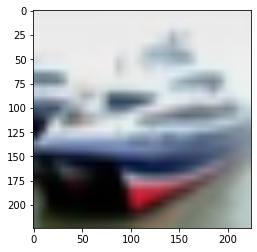

In [ ]:
#visualizing few samples from the dataset created i.e Training and testing samples
for i in range(2):
  print(np.shape(Dataset[2][i]))
  Image = Dataset[2][i]
  plt.imshow(Image)
  plt.show()

In [ ]:
#function to print output dimension of a max-pool or convolutional neural network given the following Input parameters.
'''
1. Kernel/Filter size (F) 
2. Padding size(p)
3. Input dimension(n)
4. Stride(s)
'''
import math
def Calc_OutDimension(n,f,p,s):
  print(n)
  out_dim = math.floor((n-f+2*p)/s)+1
  return int(out_dim)



In [ ]:
#defining label array
labels = ["airplane", "automobile","bird","cat","deer", "dog", "frog", "horse", "ship", "truck"]
#creating a keras model
model = Sequential()
#Adding batch normalisation after every convolutional layer helps to normalise input to each layer and thus overcome internal covariate shift problem.
model.add(layers.Conv2D(96 , kernel_size=(11,11), strides=(4,4), padding='valid',activation='relu', kernel_initializer= 'normal', input_shape = (224,224,3)))
#calculating output after this layer and storing it in a variable for next layer's dimension calculation
out1 = Calc_OutDimension(224,11,0,4)
print("Output dimension after this layer is :",out1)
#Adding Batch normalisation layer
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size =(3,3) , strides = (2,2), padding= 'valid'))
#calculating output after this layer and storing it in a variable for next layer's dimension calculation
out2= Calc_OutDimension(out1,3,0,2)
print("Output dimension after this layer is :",out2)
#Explicitly as per AlexNet Architecture; Padding has to be set to (2,2)
model.add(layers.ZeroPadding2D(padding=(2,2)))
model.add(layers.Conv2D(384, kernel_size=(5,5), strides=(1,1), activation='relu',padding='valid', kernel_initializer= 'normal'))
#calculating output after this layer and storing it in a variable for next layer's dimension calculation
out3= Calc_OutDimension(out2,5,2,1)
print("Output dimension after this layer is :",out3)
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size =(3,3), strides = (2,2), padding= 'valid'))
#calculating output after this layer and storing it in a variable for next layer's dimension calculation
out4= Calc_OutDimension(out3,3,0,2)
print("Output dimension after this layer is :",out4)
#Explicitly as per AlexNet Architecture; Padding has to be set to (2,2)
model.add(layers.ZeroPadding2D(padding=(2,2)))
model.add(layers.Conv2D(384, kernel_size=(3,3), strides=(1,1),activation='relu', padding='valid', kernel_initializer= 'normal'))
#calculating output after this layer and storing it in a variable for next layer's dimension calculation
out5= Calc_OutDimension(out4,3,2,1)
print("Output dimension after this layer is :",out5)
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size =(3,3), strides = (2,2), padding='valid'))
#calculating output after this layer and storing it in a variable for next layer's dimension calculation
out6= Calc_OutDimension(out5,3,0,1)
print("Output dimension after this layer is :",out6)
model.add(layers.Flatten())
model.add(layers.Dense(256))
model.add(layers.Dense(128))
model.add(layers.Dense(len(labels), activation= 'softmax'))
print(model.summary())

224
Output dimension after this layer is : 54
54
Output dimension after this layer is : 26
26
Output dimension after this layer is : 26
26
Output dimension after this layer is : 12
12
Output dimension after this layer is : 14
14
Output dimension after this layer is : 12
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 54, 54, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 96)        0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 30, 30, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 384) 

In [ ]:
#splitting the training data into train and val in 70-30 ratio (Crashes on Colab due to RAM restriction, uncomment in real world scenario)
"""train_samples = len(Dataset[0])* 0.7
val_samples = len(Dataset[0]) - train_samples
print(train_samples, val_samples)
#doing this via Sklearn's train-test split
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(Dataset[0], Dataset[1], test_size=0.25, random_state=42)"""

"train_samples = len(Dataset[0])* 0.7\nval_samples = len(Dataset[0]) - train_samples\nprint(train_samples, val_samples)\n#doing this via Sklearn's train-test split\nfrom sklearn.model_selection import train_test_split\nx_train, x_val, y_train, y_val = train_test_split(Dataset[0], Dataset[1], test_size=0.25, random_state=42)"

In [ ]:
#print(len(x_train), len(x_val))

In [ ]:
#compiling model with optimizer and model fit
#declaring SGD optimizer
from keras.optimizers import Adam
opt = Adam(lr=0.01)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics= keras.metrics.Accuracy())
print("Training the model")
history = model.fit(Dataset[0],Dataset[1],batch_size=64, epochs=2)

Training the model
Epoch 1/2


In [ ]:
#printing history
print(history.history)

In [ ]:
#evaluating on test dataset
model.evaluate(Dataset[2],Dataset[3], batch_size=64)
#saving model
model.save('AlexNet.h5')
#loading model
keras.models.load_model('AlexNet.h5')
